In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [17]:
df = pd.read_csv('Bioactivity_preprocessed.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive
...,...,...,...,...
1187,CHEMBL4522006,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Sc1ccc(C(F)(F...,3600.0,inactive
1188,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,4200.0,inactive
1189,CHEMBL4533598,O=C(Nc1cccs1)c1ccccc1Sc1ccc([N+](=O)[O-])cc1,98000.0,inactive
1190,CHEMBL5192980,O=C(Nc1nc2ccc([N+](=O)[O-])cc2s1)c1ccccc1Sc1cc...,34000.0,intermediate


In [18]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) #Convert each canonical_smiles string into a molecule object and store it in moldata
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0
    for mol in moldata: #iterating over the molecules to calculate the descriptors        
       
       # We acquire the values that we need 
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
        
        #for the first molecule insert the row into the basedata. Otherwise, stack it. 
        if(i==0): 
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [19]:
df_lipinski = lipinski(df['canonical_smiles'])
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0
...,...,...,...,...
1187,462.474,6.12980,3.0,6.0
1188,444.468,5.61090,4.0,7.0
1189,356.428,5.05980,1.0,5.0
1190,452.473,5.51620,1.0,8.0


In [20]:
df_combine = pd.concat([df, df_lipinski], axis=1)
df_combine

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive,240.262,2.80020,0.0,4.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive,268.224,2.44040,1.0,4.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive,407.426,1.38560,1.0,5.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive,306.277,3.84800,1.0,5.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive,372.772,2.36698,0.0,8.0
...,...,...,...,...,...,...,...,...
1187,CHEMBL4522006,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Sc1ccc(C(F)(F...,3600.0,inactive,462.474,6.12980,3.0,6.0
1188,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,4200.0,inactive,444.468,5.61090,4.0,7.0
1189,CHEMBL4533598,O=C(Nc1cccs1)c1ccccc1Sc1ccc([N+](=O)[O-])cc1,98000.0,inactive,356.428,5.05980,1.0,5.0
1190,CHEMBL5192980,O=C(Nc1nc2ccc([N+](=O)[O-])cc2s1)c1ccccc1Sc1cc...,34000.0,intermediate,452.473,5.51620,1.0,8.0


## The original IC50 values has uneven distripution of the data points. Therefore, to make it more even we have to apply negative logarithmic transformation

Source of the following function:  https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

In [29]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)
        
    return x

In [22]:
df_combine.standard_value.describe()


count      1192.000000
mean      47284.413591
std       33826.910918
min           6.000000
25%       21107.500000
50%       40795.000000
75%       70580.000000
max      432000.000000
Name: standard_value, dtype: float64

 Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [30]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)
        
    return x

In [26]:
df_norm = norm_value(df_combine)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,100000.0
...,...,...,...,...,...,...,...,...
1187,CHEMBL4522006,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Sc1ccc(C(F)(F...,inactive,462.474,6.12980,3.0,6.0,3600.0
1188,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,inactive,444.468,5.61090,4.0,7.0,4200.0
1189,CHEMBL4533598,O=C(Nc1cccs1)c1ccccc1Sc1ccc([N+](=O)[O-])cc1,inactive,356.428,5.05980,1.0,5.0,98000.0
1190,CHEMBL5192980,O=C(Nc1nc2ccc([N+](=O)[O-])cc2s1)c1ccccc1Sc1cc...,intermediate,452.473,5.51620,1.0,8.0,34000.0


In [31]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1187,CHEMBL4522006,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Sc1ccc(C(F)(F...,inactive,462.474,6.12980,3.0,6.0,5.443697
1188,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,inactive,444.468,5.61090,4.0,7.0,5.376751
1189,CHEMBL4533598,O=C(Nc1cccs1)c1ccccc1Sc1ccc([N+](=O)[O-])cc1,inactive,356.428,5.05980,1.0,5.0,4.008774
1190,CHEMBL5192980,O=C(Nc1nc2ccc([N+](=O)[O-])cc2s1)c1ccccc1Sc1cc...,intermediate,452.473,5.51620,1.0,8.0,4.468521


In [32]:
df_final.pIC50.describe()


count    1192.000000
mean        4.504237
std         0.514461
min         3.364516
25%         4.151318
50%         4.389393
75%         4.675567
max         8.221849
Name: pIC50, dtype: float64

In [33]:
df_class = df_final[df_final.bioactivity_class != 'intermediate'] #for simplicity and comparing betwe
df_class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1186,CHEMBL5172831,COc1ccc(S(=O)(=O)n2nc(Oc3ccc(-c4ccccc4)cc3)cc2...,inactive,421.478,4.17020,1.0,7.0,5.537602
1187,CHEMBL4522006,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Sc1ccc(C(F)(F...,inactive,462.474,6.12980,3.0,6.0,5.443697
1188,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,inactive,444.468,5.61090,4.0,7.0,5.376751
1189,CHEMBL4533598,O=C(Nc1cccs1)c1ccccc1Sc1ccc([N+](=O)[O-])cc1,inactive,356.428,5.05980,1.0,5.0,4.008774


Text(0, 0.5, 'Frequency')

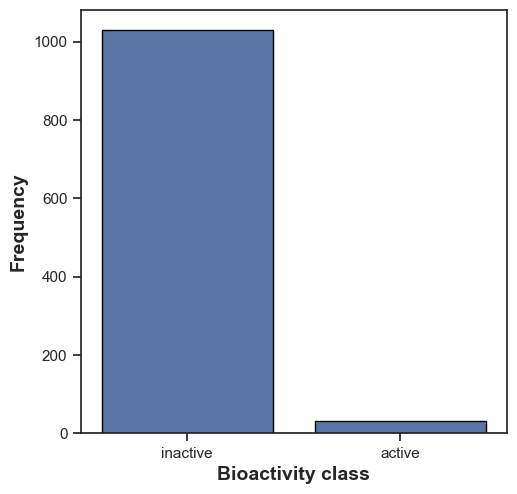

In [39]:
sns.set(style='ticks')
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


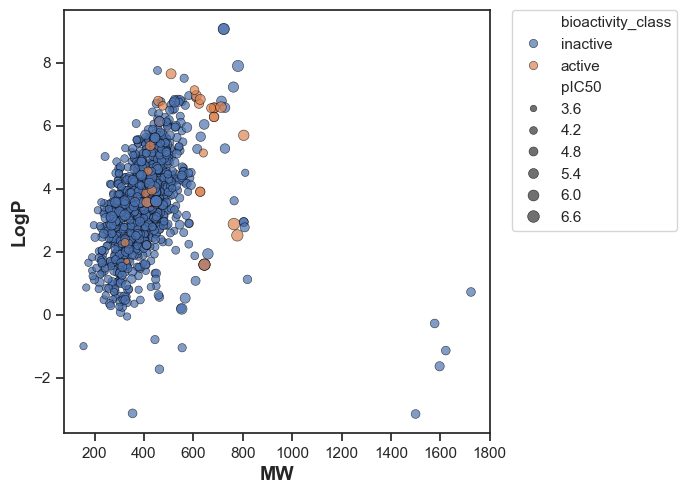

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Text(0, 0.5, 'pIC50 value')

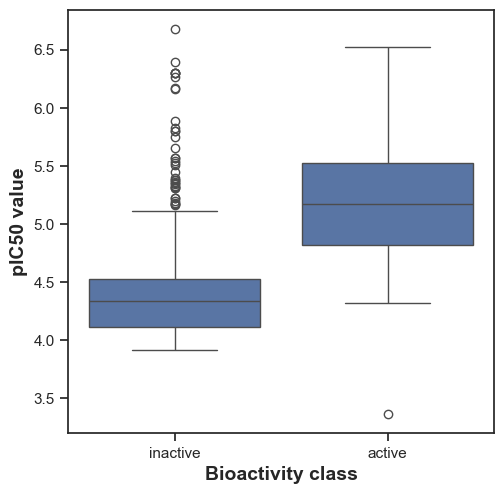

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

In [49]:
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

def mannwhitney(descriptor, verbose=False):
  
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [50]:
mannwhitney('pIC50')

ModuleNotFoundError: No module named 'numpy.char'